<a href="https://colab.research.google.com/github/sagarrokad1/LGMVIP-DataScience/blob/main/TASK-1%20Beginners%20Level/LGM_VIP_October_2021_TASK_1_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

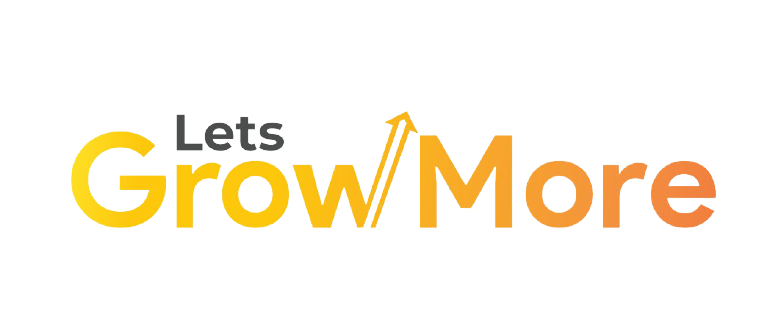


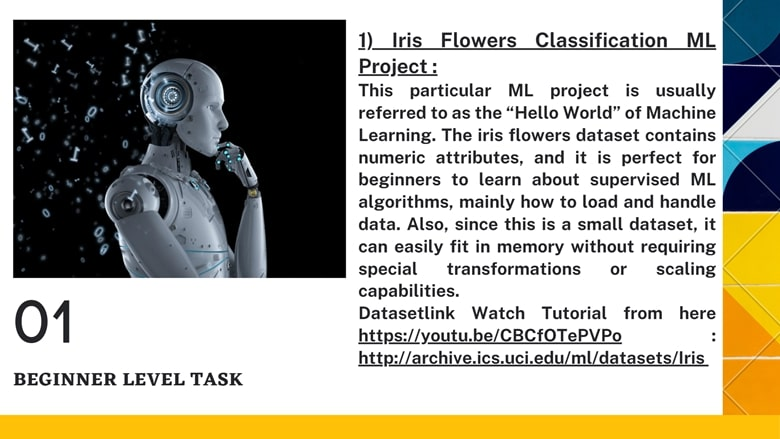

## **BY: Sagar Rokad**

### **Problem Statement**:
This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

### **About the Dataset**:
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.



## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

import sklearn
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### **Data Importing**


In [ ]:
iris = load_iris()

In [ ]:
feature_name=iris.feature_names

In [ ]:
species=iris.target_names

### **Data Cleaning and Data Formatting**

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df_i=df
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.shape

(150, 5)

In [ ]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# dataset description
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [ ]:
df['flower_name'].value_counts() #number of species

versicolor    50
virginica     50
setosa        50
Name: flower_name, dtype: int64

### **DATA VISUALIZATION**

([<matplotlib.patches.Wedge at 0x7fd7b6f71b50>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Virginica')])

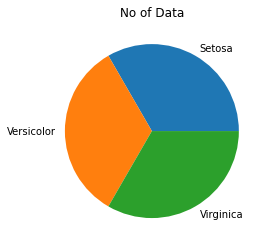

In [ ]:
length = [len(df[df.target==0]),len(df[df.target==1]),len(df[df.target==2])]
plt.title("No of Data")
plt.pie(length , labels=["Setosa", "Versicolor", "Virginica", ])

In [ ]:
df_setosa= df[:50]
df_versicolor = df[50:100]
df_virginica = df[100:]

### **Scatter Plot of with different parameter**

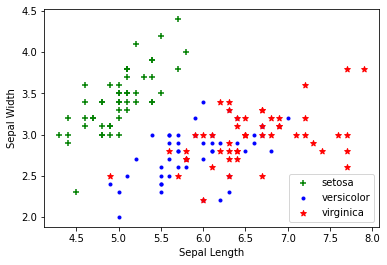

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'],color="green",marker='+')
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'],color="blue",marker='.')
plt.scatter(df_virginica['sepal length (cm)'],df_virginica['sepal width (cm)'],color="red",marker='*')
plt.legend(["setosa", "versicolor", "virginica"], loc ="lower right")

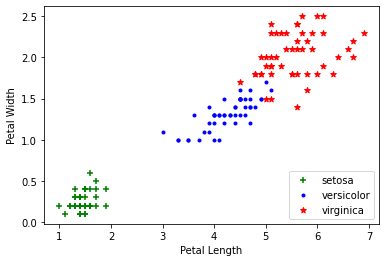

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'],color="green",marker='+')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'],color="blue",marker='.')
plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'],color="red",marker='*')
plt.legend(["setosa","versicolor", "virginica"], loc ="lower right")

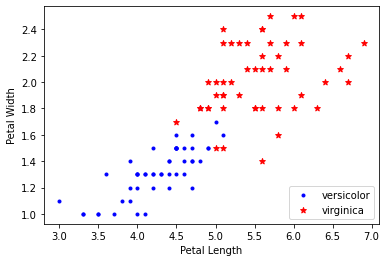

In [ ]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'],color="blue",marker='.')
plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'],color="red",marker='*')
plt.legend(["versicolor", "virginica"], loc ="lower right")

### **Box Plot of with different parameter**

{'boxes': [<matplotlib.lines.Line2D at 0x7fd7b675e950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7b6762950>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7b676a990>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7b676a450>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd7b675ee90>,
  <matplotlib.lines.Line2D at 0x7fd7b6702f10>]}

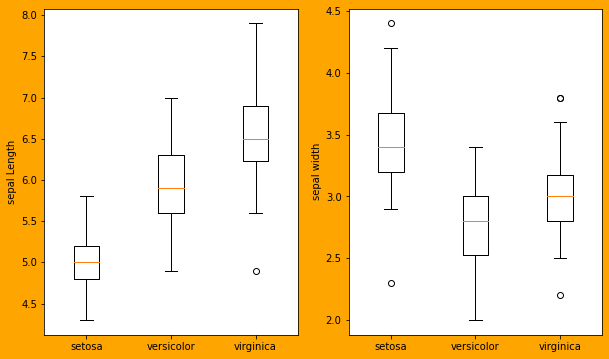

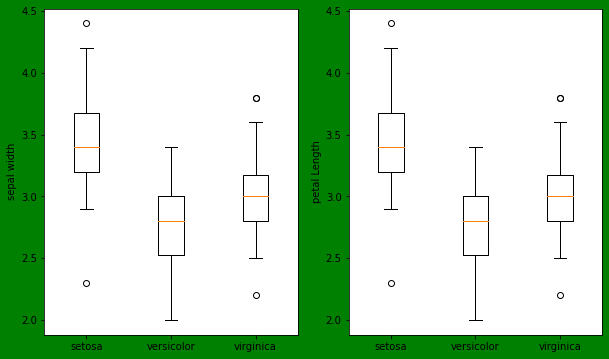

In [ ]:
df_setosa_s = df_setosa['sepal length (cm)']
df_versicolor_s= df_versicolor['sepal length (cm)']
df_virginica_s = df_virginica['sepal length (cm)']
plt.figure(1,figsize=[10.0,6.0],facecolor="orange")
plt.subplot(1,2,1)
plt.ylabel('sepal Length')
plt.boxplot([df_setosa_s,df_versicolor_s,df_virginica_s], labels=['setosa', 'versicolor','virginica'])

#------------------------------------------
df_setosa_s = df_setosa['sepal width (cm)']
df_versicolor_s= df_versicolor['sepal width (cm)']
df_virginica_s = df_virginica['sepal width (cm)']
plt.subplot(1,2,2)
plt.ylabel('sepal width')
plt.boxplot([df_setosa_s,df_versicolor_s,df_virginica_s], labels=['setosa', 'versicolor','virginica'])

#-----------------------------------------

df_setosa_s = df_setosa['sepal width (cm)']
df_versicolor_s= df_versicolor['sepal width (cm)']
df_virginica_s = df_virginica['sepal width (cm)']
plt.figure(2,figsize=[10.0,6.0],facecolor="green")
plt.subplot(1,2,1)
plt.ylabel('sepal width')
plt.boxplot([df_setosa_s,df_versicolor_s,df_virginica_s], labels=['setosa', 'versicolor','virginica'])

#--------------------------------------------

df_setosa_p = df_setosa['petal length (cm)']
df_versicolor_p= df_versicolor['petal length (cm)']
df_virginica_p = df_virginica['petal length (cm)']
plt.subplot(1,2,2)
plt.ylabel('petal Length')
plt.boxplot([df_setosa_s,df_versicolor_s,df_virginica_s], labels=['setosa', 'versicolor','virginica'])

### **Heatmap**

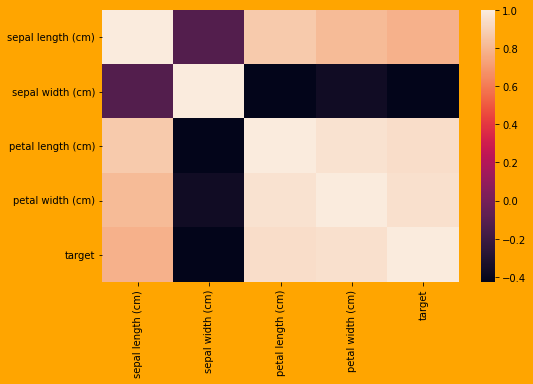

In [ ]:
plt.figure(1,figsize=[8.0,5.0],facecolor="orange")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


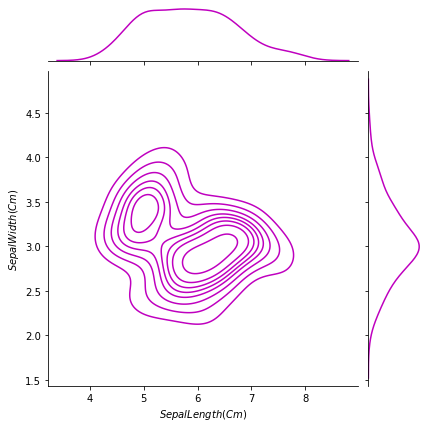

In [ ]:
iris1 = df.drop(columns = ['target','flower_name'])
g = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris1, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=40, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$SepalLength(Cm)$", "$SepalWidth(Cm)$") 
plt.show()

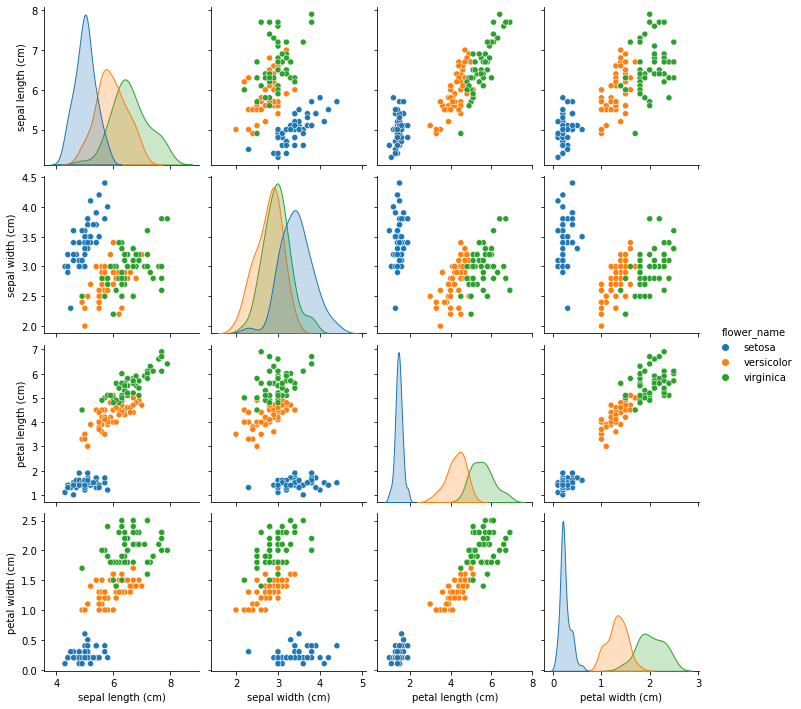

In [ ]:
iris2=df.drop(columns = ['target'])
sns.pairplot(iris2, hue="flower_name")

In [ ]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
len(X_train), len(X_test)

(105, 45)

### **Support Vector Machine (SVM)**
<h5> A Support Vector Machine is a supervised machine learning algorithm which can be used for both classification and regression problems. It follows a technique called the kernel trick to transform the data and based on these transformations, it finds an optimal boundary between the possible outputs.

In [ ]:
model = SVC(gamma='auto')

In [ ]:
model.fit(X_train, y_train,)

SVC(gamma='auto')

In [ ]:
print('The accuracy of the SVM is',model.score(X_test, y_test),'with gamma and c value is Auto')

The accuracy of the SVM is 0.9333333333333333 with gamma and c value is Auto


**'C' is a hypermeter which is set before the training model and used to control error.**

**'Gamma' is also a hypermeter which is set before the training model and used to give curvature weight of the decision boundary.**

In [ ]:
model_C = SVC(C=10,gamma='auto')
model_C.fit(X_train, y_train)


SVC(C=10, gamma='auto')

In [ ]:
model_C = SVC(C=1,gamma='auto')
model_C.fit(X_train, y_train)
print('The accuracy of the SVM is',model_C.score(X_test, y_test),'with gamma value is Auto and C value is 1')

model_C = SVC(C=10,gamma='auto')
model_C.fit(X_train, y_train)
print('The accuracy of the SVM is',model_C.score(X_test, y_test),'with gamma value is Auto and C value is 10')

The accuracy of the SVM is 0.9333333333333333 with gamma value is Auto and C value is 1
The accuracy of the SVM is 0.9333333333333333 with gamma value is Auto and C value is 10


In [ ]:
acc_SVM = [0] * 11
k=[2,3,4,5,6,7,8,9,10,15,20]
j=0;
for i in k:
        model_C_1 = SVC(C=i,gamma='auto')
        model_C_1.fit(X, y)
        acc_SVM[j]=model_C_1.score(X_test, y_test)
        j=j+1;

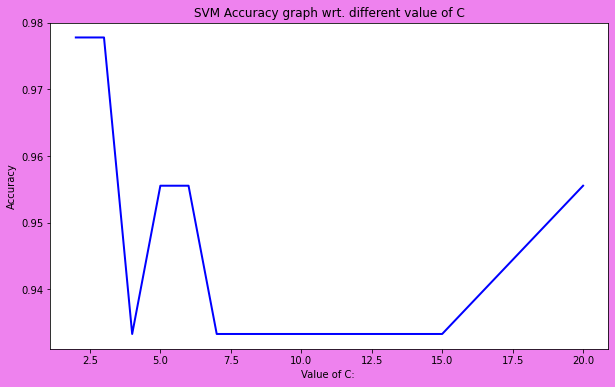

In [ ]:
plt.figure(1,figsize=[10.0,6.0],facecolor="violet")
plt.ylabel('Accuracy')
plt.xlabel('Value of C: ')
plt.title('SVM Accuracy graph wrt. different value of C')
plt.plot(k,acc_SVM,color="blue",linewidth=2, markersize=12,)

In [ ]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
print('The accuracy of the SVM is',model_g.score(X_test, y_test),'with gamma value is 7 and C value is auto.')


model_g = SVC(gamma=1)
model_g.fit(X_train, y_train)
print('The accuracy of the SVM is',model_g.score(X_test, y_test),'with gamma value is 1 and C value is auto.')

The accuracy of the SVM is 0.9333333333333333 with gamma value is 7 and C value is auto.
The accuracy of the SVM is 0.9333333333333333 with gamma value is 1 and C value is auto.


In [ ]:
model_linear_kernal = SVC(kernel='rbf',gamma='auto')
model_linear_kernal.fit(X_train, y_train)

print('The accuracy of the SVM is',model_linear_kernal.score(X_test, y_test),'kernal=rbf')

The accuracy of the SVM is 0.9333333333333333 kernal=rbf


### **K-Nearest Neighbors (KNN)**

<h5> KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. 

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X, y)
neigh.score(X_test, y_test)
print('The accuracy of the KNN is',neigh.score(X_test, y_test),'WHERE n_neighbors=2')

The accuracy of the KNN is 0.9777777777777777 WHERE n_neighbors=2


In [ ]:

acc = [0] * 5
k=[2,3,4,5,6]
for i in k:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X, y)
        acc[i-2]=neigh.score(X_test, y_test)

In [ ]:
acc

[0.9777777777777777,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

### **KNN accuracy plot for different value of n_neighbors**

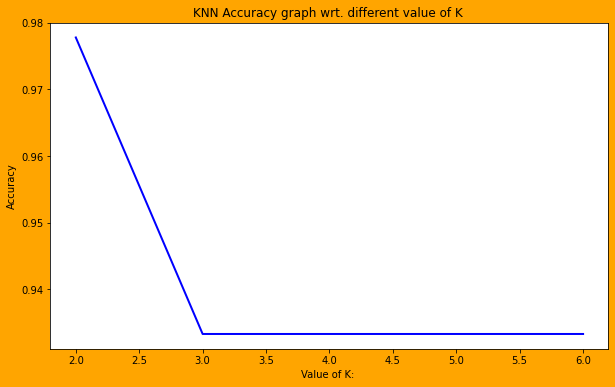

In [ ]:
plt.figure(1,figsize=[10.0,6.0],facecolor="orange")
plt.ylabel('Accuracy')
plt.xlabel('Value of K: ')
plt.title('KNN Accuracy graph wrt. different value of K ')
plt.plot(k,acc,color="blue",linewidth=2, markersize=12,)

### **Decision Tree**
<h5>Treesare a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [ ]:
dtree=DecisionTreeClassifier(max_depth=3)

In [ ]:
clf = dtree.fit(X,y)

In [ ]:
predTree = clf.predict(X_test)
print("Accuracy with depth of 3:",metrics.accuracy_score(y_test, predTree))

Accuracy with depth of 3: 0.9555555555555556


In [ ]:
acc_dt = [0] * 5
k=[2,3,4,5,6]
for i in k:
        DT = dtree=DecisionTreeClassifier(max_depth=i)
        DT.fit(X, y)
        acc_dt[i-2]=DT.score(X_test, y_test)

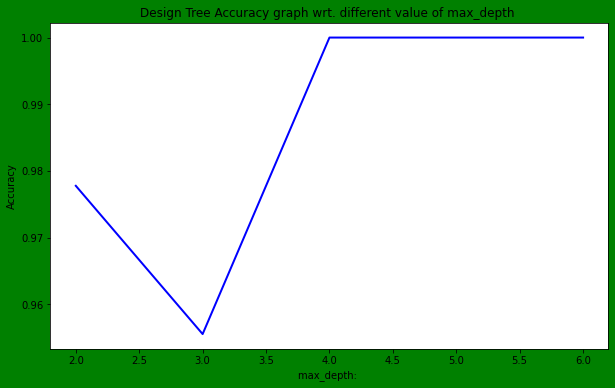

In [ ]:
plt.figure(1,figsize=[10.0,6.0],facecolor="green")
plt.ylabel('Accuracy')
plt.xlabel('max_depth: ')
plt.title('Design Tree Accuracy graph wrt. different value of max_depth ')
plt.plot(k,acc_dt,color="blue",linewidth=2, markersize=12,)

### **Design tree visualization using plot**

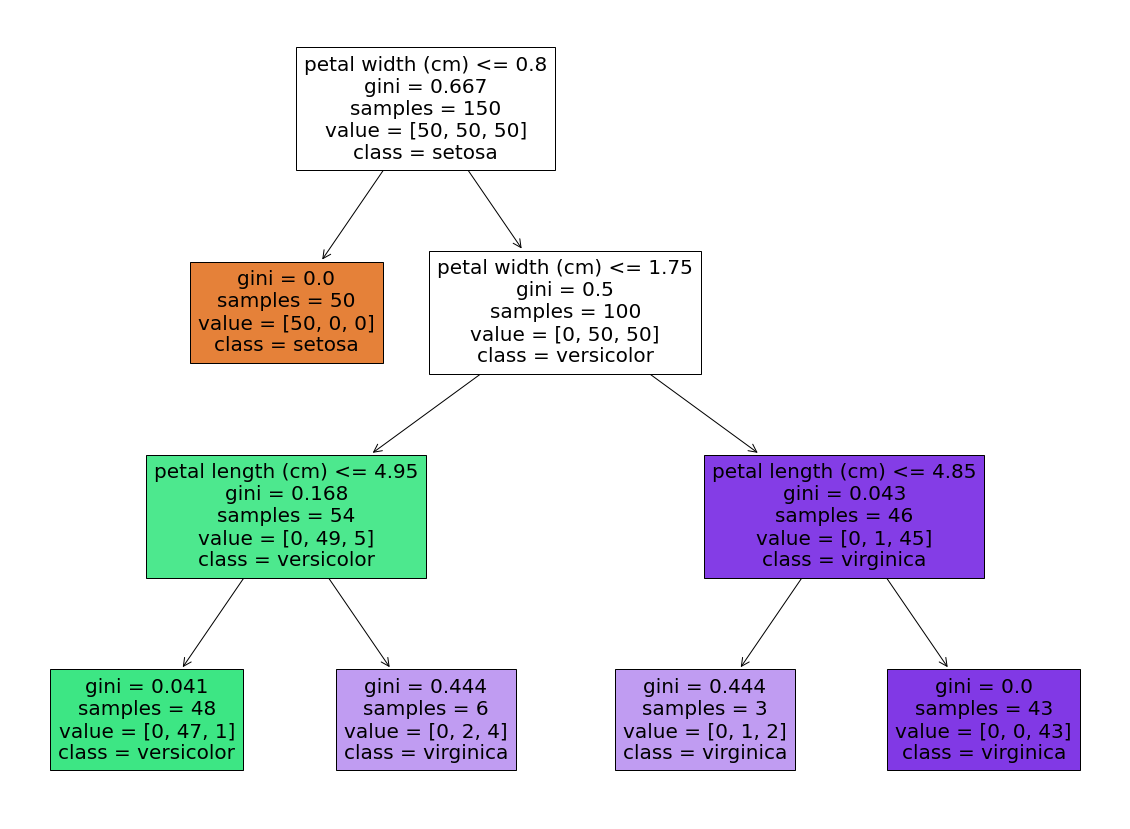

In [ ]:
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

### **Logistic Regression**

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

In [ ]:
model = LogisticRegression()
model.fit(X,y)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9555555555555556


### **Conclusion:**

We have just implemented some of the basic data preparation and exploration steps, followed by Exploratory Data Analysis and a few common Machine Learning Algorithms on the iris dataset.

